## read results 

In [1888]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [1889]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [1890]:
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from hockey.visualization.pygame.animate_hockey_game import read_and_merge_dataframes

## Helper function(s)

In [1891]:
def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / float(N)


## Read!

In [1892]:
root_dir = "/Users/luisd/luis-simulation/speed1_discrete5x5_vector"
# root_dir = "/Users/luisd/luis-simulation/speed1_discrete15x15_vector"
# root_dir = "/Users/luisd/luis-simulation/speed1_discrete4x4"

model_df = read_and_merge_dataframes(root_dir, prefix_fname="model", verbose=True)
agents_df = read_and_merge_dataframes(root_dir, prefix_fname="agents", verbose=True)

From '/Users/luisd/luis-simulation/speed1_discrete5x5_vector' I read ['/Users/luisd/luis-simulation/speed1_discrete5x5_vector/model_1.pd', '/Users/luisd/luis-simulation/speed1_discrete5x5_vector/model_2.pd', '/Users/luisd/luis-simulation/speed1_discrete5x5_vector/model_3.pd']
From '/Users/luisd/luis-simulation/speed1_discrete5x5_vector' I read ['/Users/luisd/luis-simulation/speed1_discrete5x5_vector/agents_1.pd', '/Users/luisd/luis-simulation/speed1_discrete5x5_vector/agents_2.pd', '/Users/luisd/luis-simulation/speed1_discrete5x5_vector/agents_3.pd']


In [1893]:
print("Columns on 'model' df: %s" % list(model_df))
print("Columns on 'agents' df: %s" % list(agents_df))

Columns on 'model' df: ['Unnamed: 0', 'goals', 'puck_is_taken', 'shots', 'steps', 'timestamp']
Columns on 'agents' df: ['Step', 'AgentID', 'timestamp', 'pos_x', 'pos_y', 'speed_x', 'speed_y', 'speed_magnitude', 'topuck_x', 'topuck_y', 'angle2puck', 'last_action', 'have_puck', 'can_see_puck', 'can_reach_puck']


In [1894]:
# half-ice rink
model_df = model_df.sort_values(by=('timestamp'))
model_df.index = np.arange(model_df.shape[0])
# agents
agents_df = agents_df.sort_values(by=('timestamp'))
agents_df.index = np.arange(agents_df.shape[0])

In [1895]:
seconds_between_events = round(model_df.iloc[2]["timestamp"] - model_df.iloc[1]["timestamp"], 5)
seconds_between_events

0.050000000000000003

In [1896]:
# max_tick = model_df["Unnamed: 0"].max()

In [1897]:
max_timestamp_in_seconds = model_df["timestamp"].max()
max_timestamp_in_minutes = max_timestamp_in_seconds//60
print("Have %.2f seconds of simulation, ~%d minutes" % (max_timestamp_in_seconds, max_timestamp_in_minutes))

Have 18000.20 seconds of simulation, ~300 minutes


## Agents

In [1898]:
agents_df

,Step,AgentID,timestamp,pos_x,pos_y,speed_x,speed_y,speed_magnitude,topuck_x,topuck_y,angle2puck,last_action,have_puck,can_see_puck,can_reach_puck
0,0,forward_8ec1e259-ec57-409d-ac37-04f4ad6b536f,0.05,4,4,-0.000000e+00,-0.000000e+00,0.0,-4.0,-4.0,"Angle in radians = 0.785 (Pi/2: 1.571, Pi:3.14...",NaN,False,True,False
1,0,puck_55fe535b-6fe6-4a3d-9cda-a6696e9cd0a0,0.05,0,0,0.000000e+00,0.000000e+00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,forward_8ec1e259-ec57-409d-ac37-04f4ad6b536f,0.10,3,4,-1.000000e+00,-1.224647e-16,1.0,-3.0,-4.0,"Angle in radians = 0.927 (Pi/2: 1.571, Pi:3.14...","Move => speed = 1.00 feet/sec, direction = Ang...",False,True,False
3,1,puck_55fe535b-6fe6-4a3d-9cda-a6696e9cd0a0,0.10,0,0,0.000000e+00,0.000000e+00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,forward_8ec1e259-ec57-409d-ac37-04f4ad6b536f,0.15,3,3,6.123234e-17,-1.000000e+00,1.0,-3.0,-3.0,"Angle in radians = 5.498 (Pi/2: 1.571, Pi:3.14...","Move => speed = 1.00 feet/sec, direction = Ang...",False,True,False
5,2,puck_55fe535b-6fe6-4a3d-9cda-a6696e9cd0a0,0.15,0,0,0.000000e+00,0.000000e+00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,3,forward_8ec1e259-ec57-409d-ac37-04f4ad6b536f,0.20,4,3,-1.000000e+00,0.000000e+00,1.0,-4.0,-3.0,"Angle in radians = 0.644 (Pi/2: 1.571, Pi:3.14...","Move => speed = 1.00 feet/sec, direction = Ang...",False,True,False
7,3,puck_55fe535b-6fe6-4a3d-9cda-a6696e9cd0a0,0.20,0,0,0.000000e+00,0.000000e+00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,4,puck_55fe535b-6fe6-4a3d-9cda-a6696e9cd0a0,0.25,0,0,0.000000e+00,0.000000e+00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,4,forward_8ec1e259-ec57-409d-ac37-04f4ad6b536f,0.25,4,2,1.836970e-16,-1.000000e+00,1.0,-4.0,-2.0,"Angle in radians = 5.176 (Pi/2: 1.571, Pi:3.14...","Move => speed = 1.00 feet/sec, direction = Ang...",False,True,False


In [1899]:
# agents_df[
#     agents_df['last_action'].str.contains("Grab", na=False) & 
#     (agents_df['last_action'].str.contains("FAILED", na=False) == False)
# ]


[last action = 'Move => speed = 1.00 feet/sec, direction = Angle in radians = 6.283 (Pi/2: 1.571, Pi:3.142, 3/2*Pi:4.712), so I am going Vec2d(1.0, -1.133107779529596e-15)'] puck in (0.00, 0.00), agent in (2.00, 2.00), moving towards (1.0000, -0.0000)


(-10, 13.0)

(-10, 12)

Text(0.5,1,'[red=agent speed, blue=v2puck] \n Angle 2 puck = Angle in radians = 3.927 (Pi/2: 1.571, Pi:3.142, 3/2*Pi:4.712), \n Can see puck = False, Can reach puck = False')

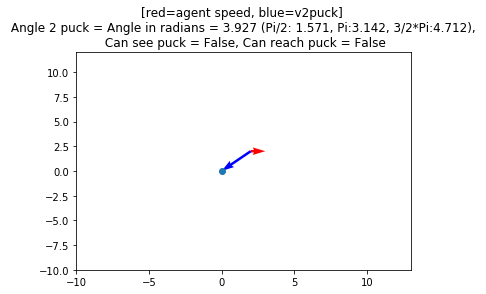

In [1900]:
# For the `can_see_puck` case, debug with root_dir = "/Users/luisd/luis-simulation/fetchpuck_minmoves5", ag_idx = 24
ag_idx = 3382
x = agents_df.loc[ag_idx]["pos_x"] # [agents_df["timestamp"] == 0.65]
y = agents_df.loc[ag_idx]["pos_y"]
sp_x = agents_df.loc[ag_idx]["speed_x"]
sp_y = agents_df.loc[ag_idx]["speed_y"]
topuck_x = agents_df.loc[ag_idx]["topuck_x"]
topuck_y = agents_df.loc[ag_idx]["topuck_y"]
angletopuck = agents_df.loc[ag_idx]["angle2puck"]
lastaction = agents_df.loc[ag_idx]["last_action"]
# plt.quiver([0, 0, 0], [0, 0, 0], [1, -2, 4], [1, 2, -7], angles='xy', scale_units='xy', scale=1)
plt.quiver([x, x], [y, y], [sp_x, topuck_x], [sp_y, topuck_y], angles='xy', scale_units='xy', scale=1, color=['red', 'blue'])
puck_x = agents_df.loc[ag_idx - 1]["pos_x"]
puck_y = agents_df.loc[ag_idx - 1]["pos_y"]
plt.plot([(puck_x)], [(puck_y)],'o')
# plt.plot([(1,2, 3)], [(3,5, 9)],'o')
print("[last action = '%s'] puck in (%.2f, %.2f), agent in (%.2f, %.2f), moving towards (%.4f, %.4f)" % (lastaction, puck_x, puck_y, x, y, sp_x, sp_y))
min_x = min([x, x - sp_x, puck_x]) - 10
max_x = max([x, x + sp_x, puck_x]) + 10
min_y = min([y, y - sp_y, puck_y]) - 10
max_y = max([y, y + sp_y, puck_y]) + 10
plt.xlim(min_x, max_x)
plt.ylim(min_y, max_y)
can_see_puck = agents_df.loc[ag_idx]["can_see_puck"]
can_reach_puck = agents_df.loc[ag_idx]["can_reach_puck"]
plt.title("[red=agent speed, blue=v2puck] \n Angle 2 puck = %s, \n Can see puck = %s, Can reach puck = %s" % (angletopuck, can_see_puck, can_reach_puck))
plt.show()

In [1901]:
agents_df[["AgentID", "timestamp", "pos_x", "pos_y", "speed_x", "speed_y",  "can_see_puck", "can_reach_puck"]]

,AgentID,timestamp,pos_x,pos_y,speed_x,speed_y,can_see_puck,can_reach_puck
0,forward_8ec1e259-ec57-409d-ac37-04f4ad6b536f,0.05,4,4,-0.000000e+00,-0.000000e+00,True,False
1,puck_55fe535b-6fe6-4a3d-9cda-a6696e9cd0a0,0.05,0,0,0.000000e+00,0.000000e+00,NaN,NaN
2,forward_8ec1e259-ec57-409d-ac37-04f4ad6b536f,0.10,3,4,-1.000000e+00,-1.224647e-16,True,False
3,puck_55fe535b-6fe6-4a3d-9cda-a6696e9cd0a0,0.10,0,0,0.000000e+00,0.000000e+00,NaN,NaN
4,forward_8ec1e259-ec57-409d-ac37-04f4ad6b536f,0.15,3,3,6.123234e-17,-1.000000e+00,True,False
5,puck_55fe535b-6fe6-4a3d-9cda-a6696e9cd0a0,0.15,0,0,0.000000e+00,0.000000e+00,NaN,NaN
6,forward_8ec1e259-ec57-409d-ac37-04f4ad6b536f,0.20,4,3,-1.000000e+00,0.000000e+00,True,False
7,puck_55fe535b-6fe6-4a3d-9cda-a6696e9cd0a0,0.20,0,0,0.000000e+00,0.000000e+00,NaN,NaN
8,puck_55fe535b-6fe6-4a3d-9cda-a6696e9cd0a0,0.25,0,0,0.000000e+00,0.000000e+00,NaN,NaN
9,forward_8ec1e259-ec57-409d-ac37-04f4ad6b536f,0.25,4,2,1.836970e-16,-1.000000e+00,True,False


## Puck movement

### Is it moving at all?

In [1902]:
all_puck_movs = agents_df[agents_df['AgentID'].str.contains("puck_", na=False) == True]
# all_puck_movs

Text(0.5,0,'Step')

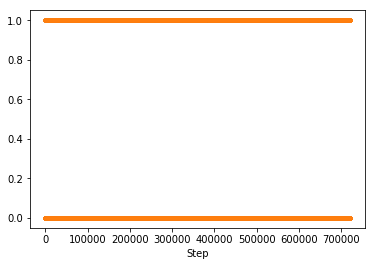

In [1903]:
# all_puck_movs.plot(x='Step', y=['pos_x', 'pos_y'], style='.')
puck_x, = plt.plot(all_puck_movs['pos_x'], '.')
puck_y, = plt.plot(all_puck_movs['pos_y'], '.')
plt.xlabel("Step")
# plt.xlim([71775, 72270])

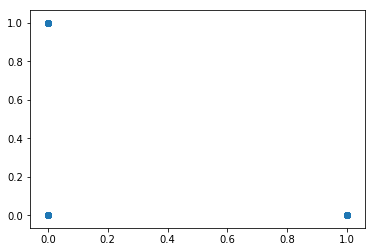

In [1904]:
plt.scatter(x=all_puck_movs['pos_x'], y=all_puck_movs['pos_y'])

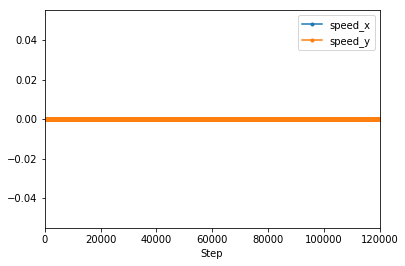

In [1905]:
all_puck_movs.plot(x='Step', y=['speed_x', 'speed_y'], style='.-')

### All events done by agents (ie, NOT puck)

In [1906]:
all_players_actions = agents_df[agents_df['AgentID'].str.contains("puck_", na=False) == False]
all_players_actions = all_players_actions.sort_values(by=('timestamp'))
all_players_actions.index = np.arange(all_players_actions.shape[0])

In [1907]:
# all_players_actions[
#             all_players_actions.timestamp.between(left=74, right=75)]

In [1908]:
# all 'shots' and 'passes' 
# all_players_actions[
#     (all_players_actions['last_action'].str.contains("send puck", na=False) == True) & 
#     (all_players_actions['last_action'].str.contains("[FAILED]", na=False) == False)
# ]

### All failed actions:

In [1909]:
# agents_df[agents_df['last_action'].str.contains("FAILED", na=False)]

### All successful GRABs:

In [1910]:
df_succ_grabs1 = all_players_actions[
    all_players_actions['have_puck'] == True
]
num_episodes1 = len(df_succ_grabs1)
print("The agent played %d episodes" % (num_episodes1))

The agent played 34962 episodes


In [1911]:
idx_first_episode = df_succ_grabs1.index[0]
df_succ_grabs1.index[:10]

Int64Index([11, 19, 72, 85, 107, 119, 141, 153, 196, 216], dtype='int64')

In [1912]:
all_players_actions[idx_first_episode - 2:idx_first_episode + 2][["AgentID", "timestamp", "pos_x", "pos_y", "speed_x", "speed_y", "last_action", "have_puck", "can_see_puck", "can_reach_puck"]]

,AgentID,timestamp,pos_x,pos_y,speed_x,speed_y,last_action,have_puck,can_see_puck,can_reach_puck
9,forward_8ec1e259-ec57-409d-ac37-04f4ad6b536f,0.50,1,2,-1.000000e+00,1.224647e-16,"Move => speed = 1.00 feet/sec, direction = Ang...",False,True,False
10,forward_8ec1e259-ec57-409d-ac37-04f4ad6b536f,0.55,1,1,-1.836970e-16,-1.000000e+00,"Move => speed = 1.00 feet/sec, direction = Ang...",False,True,False
11,forward_8ec1e259-ec57-409d-ac37-04f4ad6b536f,0.60,0,1,1.000000e+00,5.665539e-16,"Move => speed = 1.00 feet/sec, direction = Ang...",True,True,True
12,forward_8ec1e259-ec57-409d-ac37-04f4ad6b536f,0.65,4,4,-0.000000e+00,-0.000000e+00,NaN,False,False,False


In [1913]:
df_episode1 = all_players_actions[:idx_first_episode][["AgentID", "timestamp", "pos_x", "pos_y", "speed_x", "speed_y", "last_action", "have_puck", "can_see_puck", "can_reach_puck"]]

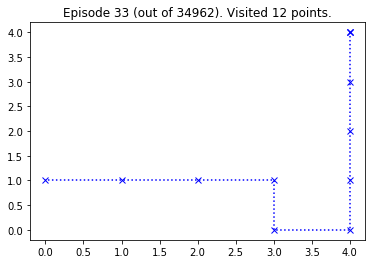

In [1914]:
episode_number = 33 # 15385
an_episode = all_players_actions[df_succ_grabs1.index[episode_number - 1] + 1:df_succ_grabs1.index[episode_number] + 1]
# an_episode = df_episode1
# an_episode = all_players_actions
# an_episode[:10]["pos_x"]
# an_episode[:10]["pos_y"]
_ = plt.plot(an_episode["pos_x"], an_episode["pos_y"], 'bx:')
# _ = plt.plot(all_players_actions["pos_x"], all_players_actions["pos_y"], 'bx:')
_ = plt.title("Episode %d (out of %d). Visited %d points." % (episode_number, num_episodes1, len(an_episode)))
plt.show()


In [1915]:
an_episode

,Step,AgentID,timestamp,pos_x,pos_y,speed_x,speed_y,speed_magnitude,topuck_x,topuck_y,angle2puck,last_action,have_puck,can_see_puck,can_reach_puck
460,460,forward_8ec1e259-ec57-409d-ac37-04f4ad6b536f,23.05,4,4,-0.000000e+00,-0.000000e+00,0.0,-4.0,-4.0,"Angle in radians = 5.498 (Pi/2: 1.571, Pi:3.14...",NaN,False,True,False
461,461,forward_8ec1e259-ec57-409d-ac37-04f4ad6b536f,23.10,4,4,-0.000000e+00,-0.000000e+00,0.0,-4.0,-4.0,"Angle in radians = 3.927 (Pi/2: 1.571, Pi:3.14...","Move => speed = 0.00 feet/sec, direction = Ang...",False,False,False
462,462,forward_8ec1e259-ec57-409d-ac37-04f4ad6b536f,23.15,4,4,-0.000000e+00,0.000000e+00,0.0,-4.0,-4.0,"Angle in radians = 5.498 (Pi/2: 1.571, Pi:3.14...","Move => speed = 0.00 feet/sec, direction = Ang...",False,True,False
463,463,forward_8ec1e259-ec57-409d-ac37-04f4ad6b536f,23.20,4,3,-1.592660e-15,-1.000000e+00,1.0,-4.0,-3.0,"Angle in radians = 5.356 (Pi/2: 1.571, Pi:3.14...","Move => speed = 1.00 feet/sec, direction = Ang...",False,True,False
464,464,forward_8ec1e259-ec57-409d-ac37-04f4ad6b536f,23.25,4,2,-1.960054e-15,-1.000000e+00,1.0,-4.0,-2.0,"Angle in radians = 5.176 (Pi/2: 1.571, Pi:3.14...","Move => speed = 1.00 feet/sec, direction = Ang...",False,True,False
465,465,forward_8ec1e259-ec57-409d-ac37-04f4ad6b536f,23.30,4,1,-1.960054e-15,-1.000000e+00,1.0,-4.0,-1.0,"Angle in radians = 4.957 (Pi/2: 1.571, Pi:3.14...","Move => speed = 1.00 feet/sec, direction = Ang...",False,True,False
466,466,forward_8ec1e259-ec57-409d-ac37-04f4ad6b536f,23.35,4,0,-1.960054e-15,1.000000e+00,1.0,-4.0,0.0,Angle in radians: Pi / 2 (= 1.5708),"Move => speed = 1.00 feet/sec, direction = Ang...",False,True,False
467,467,forward_8ec1e259-ec57-409d-ac37-04f4ad6b536f,23.40,3,0,-1.000000e+00,1.653892e-15,1.0,-3.0,0.0,"Angle in radians = 0.000 (Pi/2: 1.571, Pi:3.14...","Move => speed = 1.00 feet/sec, direction = Ang...",False,True,False
468,468,forward_8ec1e259-ec57-409d-ac37-04f4ad6b536f,23.45,3,1,-1.960054e-15,1.000000e+00,1.0,-3.0,-1.0,"Angle in radians = 1.893 (Pi/2: 1.571, Pi:3.14...","Move => speed = 1.00 feet/sec, direction = Ang...",False,False,False
469,469,forward_8ec1e259-ec57-409d-ac37-04f4ad6b536f,23.50,2,1,-1.000000e+00,-1.653892e-15,1.0,-2.0,-1.0,"Angle in radians = 0.464 (Pi/2: 1.571, Pi:3.14...","Move => speed = 1.00 feet/sec, direction = Ang...",False,True,False


In [1916]:
all_players_actions[df_succ_grabs1.index[episode_number - 1] + 1:df_succ_grabs1.index[episode_number]][["timestamp", "pos_x", "pos_y", "speed_x", "speed_y"]]

,timestamp,pos_x,pos_y,speed_x,speed_y
460,23.05,4,4,-0.000000e+00,-0.000000e+00
461,23.10,4,4,-0.000000e+00,-0.000000e+00
462,23.15,4,4,-0.000000e+00,0.000000e+00
463,23.20,4,3,-1.592660e-15,-1.000000e+00
464,23.25,4,2,-1.960054e-15,-1.000000e+00
465,23.30,4,1,-1.960054e-15,-1.000000e+00
466,23.35,4,0,-1.960054e-15,1.000000e+00
467,23.40,3,0,-1.000000e+00,1.653892e-15
468,23.45,3,1,-1.960054e-15,1.000000e+00
469,23.50,2,1,-1.000000e+00,-1.653892e-15


In [1917]:
# all_players_actions[df_succ_grabs1.index[episode_number - 1] + 1:df_succ_grabs1.index[episode_number]][["timestamp", "pos_x", "pos_y", "last_action"]]
ll = all_players_actions[df_succ_grabs1.index[episode_number - 1] + 1:df_succ_grabs1.index[episode_number]]["last_action"].tolist()
ll

[nan,
 'Move => speed = 0.00 feet/sec, direction = Angle in radians = 0.000 (Pi/2: 1.571, Pi:3.142, 3/2*Pi:4.712), so I am going Vec2d(0.0, 0.0)',
 'Move => speed = 0.00 feet/sec, direction = Angle in radians: 3*Pi/2 (= 4.7124), so I am going Vec2d(0.0, -0.0)',
 'Move => speed = 1.00 feet/sec, direction = Angle in radians: 3*Pi/2 (= 4.7124), so I am going Vec2d(1.5926598195281475e-15, -1.0)',
 'Move => speed = 1.00 feet/sec, direction = Angle in radians: 3*Pi/2 (= 4.7124), so I am going Vec2d(-1.9600538592723536e-15, -1.0)',
 'Move => speed = 1.00 feet/sec, direction = Angle in radians: 3*Pi/2 (= 4.7124), so I am going Vec2d(-1.9600538592723536e-15, -1.0)',
 'Move => speed = 1.00 feet/sec, direction = Angle in radians: 3*Pi/2 (= 4.7124), so I am going Vec2d(-1.9600538592723536e-15, -1.0)',
 'Move => speed = 1.00 feet/sec, direction = Angle in radians: Pi (= 3.1416), so I am going Vec2d(-1.0, -1.6538921594855151e-15)',
 'Move => speed = 1.00 feet/sec, direction = Angle in radians: 3*Pi/

In [1918]:
# # df_succ_grabs = all_players_actions[
# #     all_players_actions['last_action'].str.contains("Grab", na=False) & 
# #     (all_players_actions['last_action'].str.contains("FAILED", na=False) == False)
# # ]
# df_succ_grabs = agents_df[
#     agents_df['last_action'].str.contains("Grab", na=False) & 
#     (agents_df['last_action'].str.contains("FAILED", na=False) == False)
# ]
df_succ_grabs = agents_df[
    agents_df['have_puck'] == True
]
num_episodes = len(df_succ_grabs)
print("The agent played %d episodes" % (num_episodes))


The agent played 34962 episodes


In [1919]:
df_succ_grabs.index[:10]

Int64Index([22, 38, 144, 170, 214, 238, 282, 307, 392, 432], dtype='int64')

In [1920]:
# all_players_actions.iloc[2755:2763]
agents_df.iloc[6596:7000][["AgentID", "timestamp", "pos_x", "pos_y", "speed_x", "speed_y", "last_action", "have_puck", "can_see_puck", "can_reach_puck"]]

,AgentID,timestamp,pos_x,pos_y,speed_x,speed_y,last_action,have_puck,can_see_puck,can_reach_puck
6596,forward_8ec1e259-ec57-409d-ac37-04f4ad6b536f,164.95,4,4,-0.000000e+00,-0.000000e+00,NaN,False,False,False
6597,puck_55fe535b-6fe6-4a3d-9cda-a6696e9cd0a0,164.95,0,0,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN
6598,forward_8ec1e259-ec57-409d-ac37-04f4ad6b536f,165.00,3,4,-1.000000e+00,-2.131628e-14,"Move => speed = 1.00 feet/sec, direction = Ang...",False,True,False
6599,puck_55fe535b-6fe6-4a3d-9cda-a6696e9cd0a0,165.00,0,0,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN
6600,puck_55fe535b-6fe6-4a3d-9cda-a6696e9cd0a0,165.05,0,0,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN
6601,forward_8ec1e259-ec57-409d-ac37-04f4ad6b536f,165.05,3,3,-2.103301e-14,-1.000000e+00,"Move => speed = 1.00 feet/sec, direction = Ang...",False,True,False
6602,forward_8ec1e259-ec57-409d-ac37-04f4ad6b536f,165.10,2,3,-1.000000e+00,2.143875e-14,"Move => speed = 1.00 feet/sec, direction = Ang...",False,True,False
6603,puck_55fe535b-6fe6-4a3d-9cda-a6696e9cd0a0,165.10,0,0,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN
6604,forward_8ec1e259-ec57-409d-ac37-04f4ad6b536f,165.15,1,3,-1.000000e+00,2.143875e-14,"Move => speed = 1.00 feet/sec, direction = Ang...",False,True,False
6605,puck_55fe535b-6fe6-4a3d-9cda-a6696e9cd0a0,165.15,0,0,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN


2400


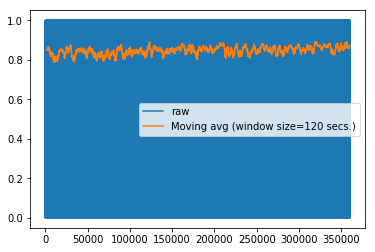

In [1921]:
speeds = all_players_actions["speed_magnitude"].tolist()
raw, = plt.plot(speeds, '-', label="raw")
window_size_in_secs = 120
window_size = int(round(window_size_in_secs / seconds_between_events))
print(window_size)

r_mean = running_mean(speeds, N = window_size)
rm, = plt.plot(range(window_size - 1, len(speeds)), r_mean, label='Moving avg (window size=%d secs.)' % (window_size_in_secs))
plt.legend(handles=[raw, rm])
# plt.xlim([2.5e6, 2.5e6 + 3000])

In [1922]:
print(len(all_players_actions.index))
print(len(all_players_actions.index.unique()))

360004
360004


In [1923]:
all_players_actions.index[0:10]

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int64')

In [1924]:
all_players_actions.index.max()

360003

In [1925]:
all_players_actions[:3]

,Step,AgentID,timestamp,pos_x,pos_y,speed_x,speed_y,speed_magnitude,topuck_x,topuck_y,angle2puck,last_action,have_puck,can_see_puck,can_reach_puck
0,0,forward_8ec1e259-ec57-409d-ac37-04f4ad6b536f,0.05,4,4,-0.000000e+00,-0.000000e+00,0.0,-4.0,-4.0,"Angle in radians = 0.785 (Pi/2: 1.571, Pi:3.14...",NaN,False,True,False
1,1,forward_8ec1e259-ec57-409d-ac37-04f4ad6b536f,0.10,3,4,-1.000000e+00,-1.224647e-16,1.0,-3.0,-4.0,"Angle in radians = 0.927 (Pi/2: 1.571, Pi:3.14...","Move => speed = 1.00 feet/sec, direction = Ang...",False,True,False
2,2,forward_8ec1e259-ec57-409d-ac37-04f4ad6b536f,0.15,3,3,6.123234e-17,-1.000000e+00,1.0,-3.0,-3.0,"Angle in radians = 5.498 (Pi/2: 1.571, Pi:3.14...","Move => speed = 1.00 feet/sec, direction = Ang...",False,True,False


(9000, 12000)

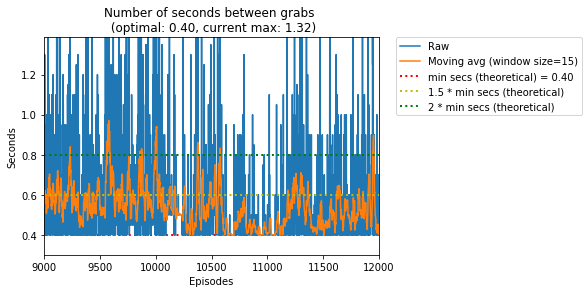

In [1926]:
# max_theoretical, = plt.axhline(y=9,linewidth=4, color='r', label='max secs (thoretical)')
# for experiment with ONLY 10 ft/sec, 13 secs is the optimal
speed_of_agent = 1
# num_min_moves = (1 + 1 + 14 + 13)/speed_of_agent # ((1 + 1 + 3)/speed_of_agent)
num_min_moves = (8)/speed_of_agent # ((1 + 1 + 3)/speed_of_agent)
num_min_secs = num_min_moves * seconds_between_events # 130/speed_of_agent
two_time_num_min_secs = 2 * num_min_secs
one_and_half_time_num_min_secs = 1.5 * num_min_secs
num_opt_plot = plt.axhline(
    y=num_min_secs,
    linewidth=2, 
    color='r', 
    label='min secs (theoretical) = %.2f' % (num_min_secs),
    linestyle=':')
# plt.axhline(y=num_min_secs * 1.5,linewidth=2, color='r', label='max secs (thoretical)')

timestamps_grabs = agents_df.iloc[df_succ_grabs.index]["timestamp"].tolist()
seconds_between = [(time2 - time1) for time1, time2 in zip(timestamps_grabs, timestamps_grabs[1:])]
seconds_between_plot, = plt.plot(seconds_between, label='Raw')
window_size = 15
r_mean = running_mean(seconds_between, N = window_size)
moving_avg_plot, = plt.plot(range(window_size - 1, len(seconds_between)), r_mean, label='Moving avg (window size=%d)' % (window_size))
two_num_opt_plot = plt.axhline(y=two_time_num_min_secs,linewidth=2, color='g', label='2 * min secs (theoretical)', linestyle=':')
one_and_half_num_opt_plot = plt.axhline(y=one_and_half_time_num_min_secs,linewidth=2, color='y', label='1.5 * min secs (theoretical)', linestyle=':')
_ = plt.legend(handles=[seconds_between_plot, moving_avg_plot, num_opt_plot, one_and_half_num_opt_plot, two_num_opt_plot], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


_ = plt.xlabel("Episodes")
_= plt.ylabel("Seconds")
_ = plt.title("Number of seconds between grabs \n (optimal: %.2f, current max: %.2f)" % (num_min_secs, np.amax(r_mean)))
# display_how_many_episodes = 575
# print("Zooming in to last %d episodes" % (display_how_many_episodes))
# _ = plt.xlim([num_episodes - display_how_many_episodes, num_episodes])
plt.xlim([9000,12000])
# plt.ylim([0.75 * num_min_secs, 200])
_ = plt.ylim([0.75 * num_min_secs, 1.05 * np.amax(r_mean)]) # 1.10 * np.amax(seconds_between)]) 


In [1927]:
import math
bucket_in_minutes = 1
events_with_puck = []
for curr_minute in range(0, int(math.ceil(max_timestamp_in_minutes)), bucket_in_minutes):
    min_second = curr_minute * 60 # (curr_minute - bucket_in_minutes) * 60
    max_second = min_second + bucket_in_minutes * 60 # curr_minute * (bucket_in_minutes * 60)
    num_events = len(
        all_players_actions[
            all_players_actions.timestamp.between(left=min_second, right=max_second) & \
            all_players_actions['have_puck'] == True
        ]
    )
    events_with_puck.append(num_events)
    # print("second: %d, num events: %d" % (curr_second, num_events))
    # len(all_players_actions[all_players_actions['timestamp'] <= curr_second))

300 minutes, so there are 301 buckets of 1' long each


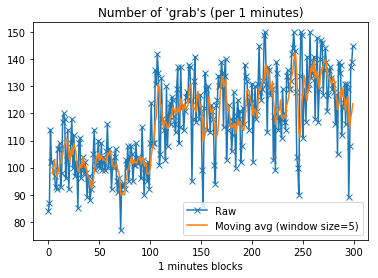

In [1928]:
print("%d minutes, so there are %d buckets of %d' long each" % (max_timestamp_in_minutes, max_timestamp_in_minutes//bucket_in_minutes + 1, bucket_in_minutes))
events_with_puck_plot, = plt.plot(events_with_puck, 'x-', label="Raw")
window_size = 5
r_mean = running_mean(events_with_puck, N = window_size)
moving_avg_plot, = plt.plot(range(window_size - 1, len(events_with_puck)), r_mean, label='Moving avg (window size=%d)' % (window_size))
_ = plt.legend(handles=[events_with_puck_plot, moving_avg_plot])

_ = plt.xlabel("%d minutes blocks" % bucket_in_minutes)
# plt.ylabel("Number of 'grab's (per %d minutes)" % bucket_in_minutes)
_ = plt.title("Number of 'grab's (per %d minutes)" % bucket_in_minutes)
# plt.xlim([len(events_with_puck) - 100, len(events_with_puck)])
# print("Only plotting from block %d to %d" % (len(events_with_puck) - 100, len(events_with_puck)))

In [1929]:
# import pickle
# from hockey.behaviour.core.action import HockeyAction
# from hockey.behaviour.core.bitstring_environment_state import BitstringEnvironmentState

# brain_file = "/Users/luisd/luis-simulation/models/brainfetchpuck_minmoves2.bin"
# model = pickle.load(open(brain_file, 'rb'))
# print("%d rules read." % (len(model)))
# best_fitness_rule_and_fitness = (None, -10)
# for rule in model:
# #     if rule.fitness > .5:
# #         print(rule.condition, '=>', rule.action, ' [%.5f, experience: %d]' % (rule.fitness, rule.experience))
#     if  rule.action == HockeyAction.GRAB_PUCK:
#         print(rule.condition, '=>', rule.action, ' [%.5f, experience: %d]' % (rule.fitness, rule.experience))
#         if best_fitness_rule_and_fitness[1] < rule.fitness:
#             best_fitness_rule_and_fitness = (rule, rule.fitness)
# best_rule = best_fitness_rule_and_fitness[0]
# print("Best rule for 'GRAB_PUCK' is ")
# print(best_rule.condition, '=>', best_rule.action, ' [%.5f, experience: %d]' % (best_rule.fitness, best_rule.experience))
# print(BitstringEnvironmentState.explain_condition(condition=best_fitness_rule_and_fitness[0].condition))

# SCRATCH PAPER DOWN HERE